In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

%config InlineBackend.figure_format = 'retina'

In [7]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [3]:
fig_save_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/figs/'

data_path = 'D:/ryanh/github/TgF344-AD_Open_Field/notebooks/data/'
all_paths_wt = np.load(data_path+'all_paths_wt.npy')
all_paths_tg = np.load(data_path+'all_paths_tg.npy')

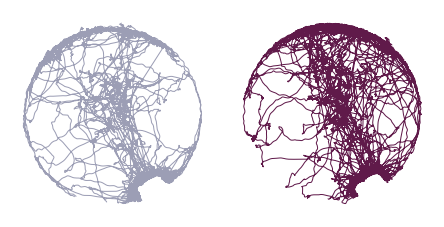

In [32]:
fig, axs = plt.subplots(1,2, figsize=set_size('thesis', fraction=1, subplots=(1, 2)), edgecolor='w')
fig.subplots_adjust(hspace = 0, wspace=-.5)
axs = axs.ravel()

flatui = ["#601a4a","#9c9eb5"]  

axs[0].plot(all_paths_wt[:,0],all_paths_wt[:,1],color=flatui[1],alpha=1,linewidth=.5)
axs[1].plot(all_paths_tg[:,0],all_paths_tg[:,1],color=flatui[0],alpha=1,linewidth=.5)

axs[0].axis('off')
axs[1].axis('off')

axs[0].set_aspect('equal','box')
axs[1].set_aspect('equal','box')

plt.savefig(fig_save_path+'paths_d1.svg',dpi=300,bbox_inches='tight')
